In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

### <font color="black"> Esercizio 01.1

Lo scopo di questa esercercitazione è quello di testare la bontà del generatore di numeri casuali fornito a lezione. Nel primo esercizio e nel secondo esercizio sono state calcolate la media e la devizione standard di $10^5$ numeri estratti in accordo con una distribuzione uniforme tra 0 e 1 e si è andati a confrontare i valori ottenuti con i valori attesi. In entrambe le simulazioni le incertezze sono state calcolate mediante il metodo dei blocchi utilizzando 100 blocchi. Di seguito mostriamo i grafici dei valori ottenuti per la media e la devizione standard con le relative incertezze in funzione del numero di blocchi.

In [9]:
path1 = '01.1/ese_1.dat'
path2 = '01.1/ese_2.dat'
db_r = pd.read_csv(path1, sep= '\t' , header = None)


In [10]:
r=db_r.iloc[:,0]
r_mean=r-0.5
sigma_r=db_r.iloc[:,1]

db_s = pd.read_csv(path2, sep=' ', header = None)
sigma=db_s.iloc[:,0]
incertezza=db_s.iloc[:,1]
sigma_mean=sigma-(1/12)

In [11]:
blocchi=100
Nblocchi = []

for i in range(0, blocchi):
    Nblocchi.append(i)

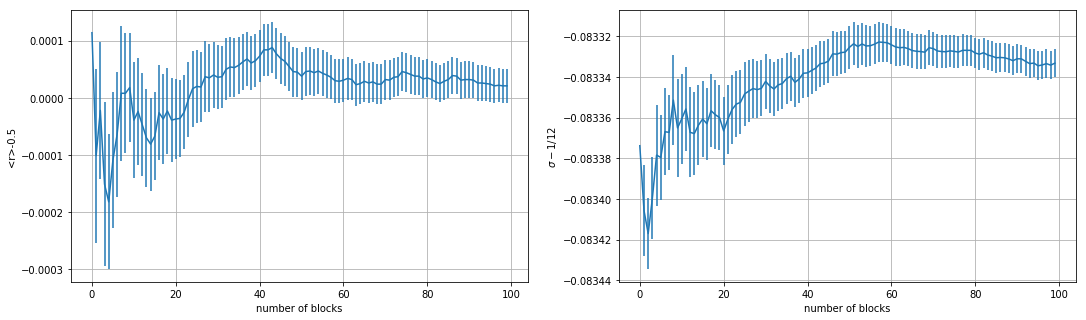

In [12]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.errorbar(Nblocchi,r_mean,yerr=sigma_r)
plt.xlabel('number of blocks')
plt.ylabel('<r>-0.5')
plt.grid(True)

plt.subplot(1,2,2)
plt.errorbar(Nblocchi,sigma_mean,yerr=incertezza)
plt.xlabel('number of blocks')
plt.ylabel('$\sigma-1/12$')
plt.grid(True)

Come possiamo notare in entrambi i grafici le stime sono in ottimo accordo con il valor vero. 

Per finire, abbiamo verificato che i numeri estratti fossero in accordo con una distribuzione uniforme. Per far ciò abbiamo applicato il test del $\chi^2$ di Pearson dividendo l'intervallo $[0,1]$ in 100 sottintervalli e calcolando il valore di $\chi^2$ con la seguente formula: $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$ Questa operazione è stata ripetuta 100 volte ed i risultati sono stati raccolti in un grafico. 

In [13]:
path3 = '01.1/ese_3.dat'

In [14]:
chi = pd.read_csv(path3, header = None)
trials=[]
for i in range (0, 100):
    trials.append(10000*(i+1))

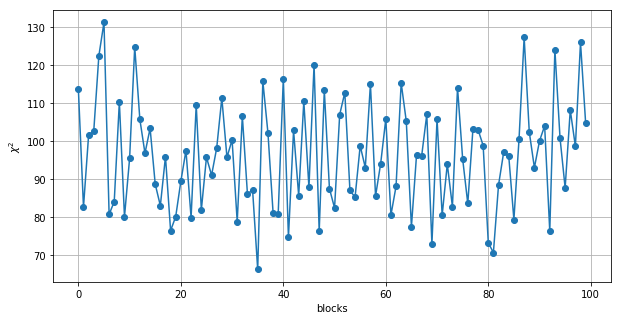

In [15]:
plt.figure(figsize=(10,5))
plt.plot(Nblocchi,chi, marker="o")
plt.xlabel('blocks')
plt.ylabel('$\chi^2$')
plt.grid(True)

In questo caso notiamo che i valori di $\chi^2$ ottenuti oscillano intorno al valore di 100 che è il valore che ci aspettiamo assuma (in media).

### Esercizio 01.2: 
Nella seconda parte di questa esercitazione è stato verificato il teorema del limite centrale. Come prima cosa il generatore di numeri casuali è stato implementato aggiungendo la possibilità di estrarre numeri distribuiti secondo la distribuzione esponenziale e secondo la distribuzione di cauchy-Lorentz. Successivamente per verificare il teorema del limite cetrale si è agito nel seguente modo: per ogni distribuzione di probabilità implementate sono stati estratti $N$ numeri casuali con i quali è stata calcolata la media aritmetica, il precedeimento è stato iterato $10^4$ volte per ottenendo $10^4$ valori della media, con questo sample è stato quindi costruito l'isogramma. In tutto sono stati fatti quattro istogrammi (per ogni distribuzione) variando il numero di elementi con cui viene costruita la singola media: $N$ assume i valori $1, 2, 10, 100$. Di seguito mostriamo gli istogrammi ottenuti.


Durante la simulazione il valore del parametro $\lambda$ della distribuzione esponenziale è stato posto a $1$, mentre per la ditribuzione di Cauchy-Lorentz sono stati posti $\mu=0$ e $\Gamma=1$. Ogni istrogramma è stato costruito con $100$ bin.

In [16]:


path4 = '01.2'

In [17]:
db_1= pd.read_csv(path4 + '/HistoL.1', header = None)
db_2= pd.read_csv(path4 + '/HistoL.2', header = None)
db_10= pd.read_csv(path4 + '/HistoL.10', header = None)
db_100= pd.read_csv(path4 + '/HistoL.100', header = None)
db_lor = pd.DataFrame(columns = ['N=1', 'N=2', 'N=10', 'N=100'])

In [18]:
#cauchy-lorentz
db_lor['N=1'] = list(db_1.iloc[:,0])
db_lor['N=2'] = list(db_2.iloc[:,0])
db_lor['N=10'] = list(db_10.iloc[:,0])
db_lor['N=100'] = list(db_100.iloc[:,0])

y1= np.array(db_lor.iloc[:,0], dtype=float)
y2= np.array(db_lor.iloc[:,1], dtype=float)
y10= np.array(db_lor.iloc[:,2], dtype=float)
y100= np.array(db_lor.iloc[:,3], dtype=float)

In [19]:
#esponenziale
db_exp1= pd.read_csv(path4 + '/HistoE.1', header = None)
db_exp2= pd.read_csv(path4 + '/HistoE.2', header = None)
db_exp10= pd.read_csv(path4 + '/HistoE.10', header = None)
db_exp100= pd.read_csv(path4 + '/HistoE.100', header = None)
db_exp = pd.DataFrame(columns = ['N=1', 'N=2', 'N=10', 'N=100'])

In [20]:
db_exp['N=1'] = list(db_exp1.iloc[:,0])
db_exp['N=2'] = list(db_exp2.iloc[:,0])
db_exp['N=10'] = list(db_exp10.iloc[:,0])
db_exp['N=100'] = list(db_exp100.iloc[:,0])

z1= np.array(db_exp.iloc[:,0], dtype=float)
z2= np.array(db_exp.iloc[:,1], dtype=float)
z10= np.array(db_exp.iloc[:,2], dtype=float)
z100= np.array(db_exp.iloc[:,3], dtype=float)

In [21]:
#uniforme
db_uni1= pd.read_csv(path4 + '/HistoU.1', header = None)
db_uni2= pd.read_csv(path4 + '/HistoU.2', header = None)
db_uni10= pd.read_csv(path4 + '/HistoU.10', header = None)
db_uni100= pd.read_csv(path4 + '/HistoU.100', header = None)
db_uni = pd.DataFrame(columns = ['N=1', 'N=2', 'N=10', 'N=100'])

In [22]:
db_uni['N=1'] = list(db_uni1.iloc[:,0])
db_uni['N=2'] = list(db_uni2.iloc[:,0])
db_uni['N=10'] = list(db_uni10.iloc[:,0])
db_uni['N=100'] = list(db_uni100.iloc[:,0])

k1= np.array(db_uni.iloc[:,0], dtype=float)
k2= np.array(db_uni.iloc[:,1], dtype=float)
k10= np.array(db_uni.iloc[:,2], dtype=float)
k100= np.array(db_uni.iloc[:,3], dtype=float)

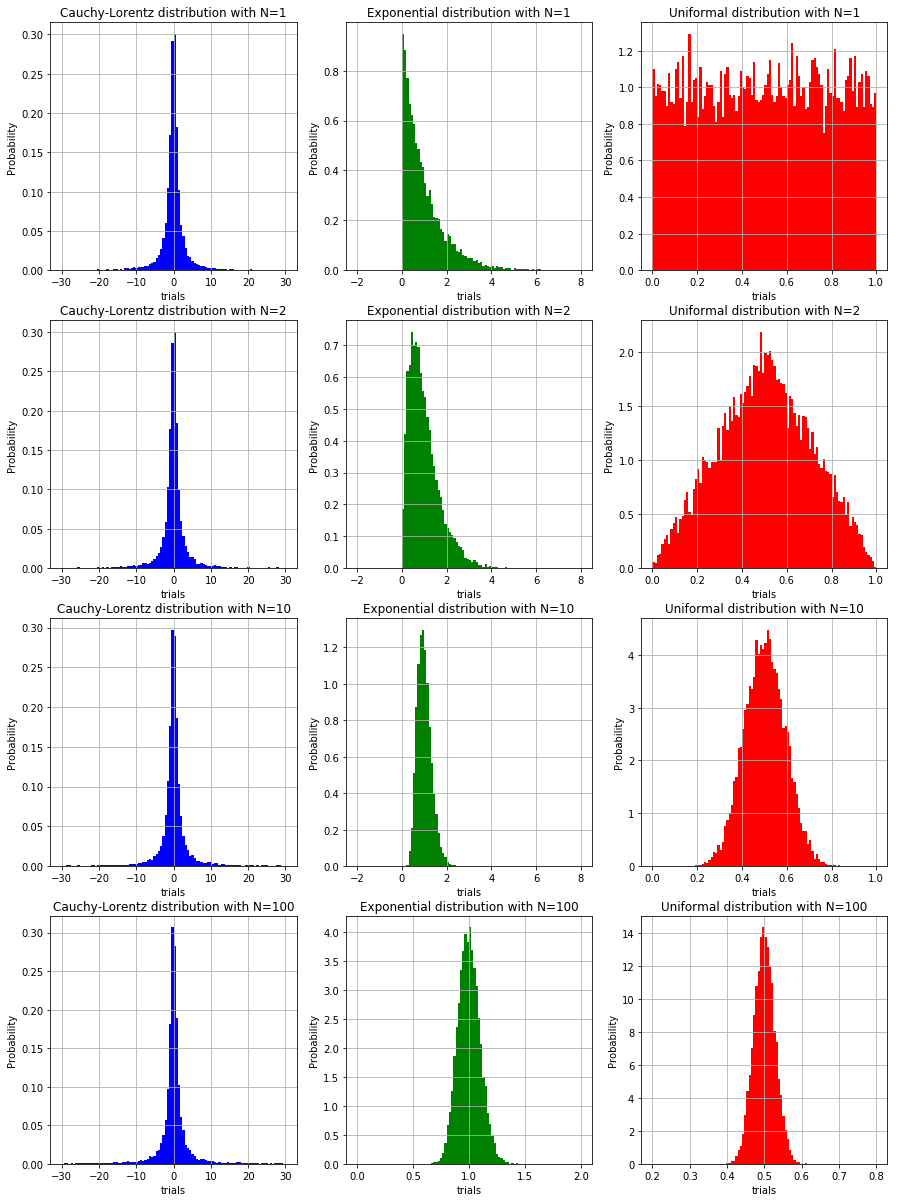

In [23]:
# N=1
n_bins = 100
plt.figure(figsize=(15,21))
plt.subplot(4, 3, 1)
n, bins, patches = plt.hist(y1, n_bins, density=True, facecolor='b', range=(-30, 30))
plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Cauchy-Lorentz distribution with N=1')
plt.grid(True)

plt.subplot(4, 3, 2)
n, bins, patches = plt.hist(z1, n_bins, density=True,facecolor='g', range=(-2, 8))

plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Exponential distribution with N=1')
plt.grid(True)

plt.subplot(4, 3, 3)
n, bins, patches = plt.hist(k1, n_bins, density=True, facecolor='r', range=(0, 1))

plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Uniformal distribution with N=1')
plt.grid(True)

# N=2
plt.subplot(4, 3, 4)
plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Cauchy-Lorentz distribution with N=2')
n, bins, patches = plt.hist(y2, n_bins, density=True, facecolor='b', range=(-30, 30))
plt.grid(True)
plt.subplot(4, 3, 5)
plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Exponential distribution with N=2')
n, bins, patches = plt.hist(z2, n_bins, density=True, facecolor='g', range=(-2, 8))
plt.grid(True)
plt.subplot(4, 3, 6)

plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Uniformal distribution with N=2')
n, bins, patches = plt.hist(k2, n_bins, density=True, facecolor='r', range=(0, 1))
plt.grid(True)

# N=10
plt.subplot(4, 3, 7)
plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Cauchy-Lorentz distribution with N=10')
n, bins, patches = plt.hist(y10, n_bins, density=True, facecolor='b', range=(-30, 30))
plt.grid(True)

plt.subplot(4, 3, 8)
plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Exponential distribution with N=10')
n, bins, patches = plt.hist(z10, n_bins, density=True, facecolor='g', range=(-2, 8))
plt.grid(True)
plt.subplot(4, 3, 9)
plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Uniformal distribution with N=10')
n, bins, patches = plt.hist(k10, n_bins, density=True, facecolor='r', range=(0, 1))
plt.grid(True)

# N=100
plt.subplot(4, 3, 10)
plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Cauchy-Lorentz distribution with N=100')
n, bins, patches = plt.hist(y100, n_bins, density=True, facecolor='b', range=(-30, 30))
plt.grid(True)

plt.subplot(4, 3, 11)
plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Exponential distribution with N=100')
n, bins, patches = plt.hist(z100, n_bins, density=True, facecolor='g', range=(-0, 2))
plt.grid(True)

plt.subplot(4, 3, 12)
plt.xlabel('trials')
plt.ylabel('Probability')
plt.title('Uniformal distribution with N=100')
n, bins, patches = plt.hist(k100, n_bins, density=True, facecolor='r', range=(0.2, 0.8))
plt.grid(True)


Come possiamo notare per la distribuzione esponenziale (istogrammi verdi) e per la distribuzione uniforme (istogrammi rossi) all'aumentare del numero $N$ di elementi che costituiscono la media la forma dell'istogramma si approssima sempre più a una gaussiana centrata nel valor medio della distrbuzione, segno che la distribuzione gaussiana è un attrattore per le distribuzioni esponenziali e uniformi (esattamente come sancisce il CLT). Per quanto riguarda la distribuzione di Cauchy-Lorentz essa non rispetta le ipotesi del teorema del limite centrale in quanto non presenta varianza finita, si vede infattiche non viene approssimata da una gaussiana all'aumentare di $N$. L'attrattore della distribuzione di Cauchy non è quindi una gaussiana ma una distribuzione di Cauchy, lo si può intuire notando che la forma dell'istogramma rimane simile a se stessa al tendere di $N$ a infinito. 

### Esercizio 01.3: 
L'ultima parte di questa esercitazione aveva come scopo quello di stimare il valore di $\pi$ mediante l'esperimento di Buffon. Le estrazioni totali fatte sono state $10^6$ e le incertezze  sono state calcolate mediante il metodo dei blocchi utilizzando 100 blocchi, gli altri parametri utilizzati per la simulazione sono stati: $L=5$ e $d=15$

In [24]:
path5 = '01.3'

In [25]:
db_b = pd.read_csv(path5 + '/Buffon', sep= ' ' , header = None)

In [26]:
pi=db_b.iloc[:,0]

In [27]:
sigma_pi=db_b.iloc[:,1]

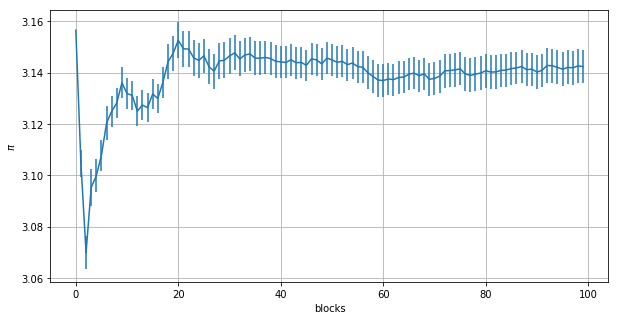

In [28]:
plt.figure(figsize=(10,5))
plt.errorbar(Nblocchi,pi,yerr=sigma_pi)
plt.xlabel('blocks')
plt.ylabel('$\pi$')
plt.grid(True)